# Fuzzy C-Means Clustering with Python

## Pattern Recognition Course 

### Ferdowsi University of Mashhad (2024)

#### Professor: Dr. Hadi Sadoghi Yazdi
#### Student: Mustafa Sadeghi  

---

### Importing Libraries
We start by importing essential libraries:
- `numpy` for numerical computations.
- `matplotlib` for plotting.
- `sklearn.datasets` to load the Iris dataset.
- `PCA` from `sklearn.decomposition` to reduce data to two dimensions for easier visualization.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

### Initialize Membership Matrix
This function initializes the membership matrix, which indicates the degree of membership for each data point in each cluster. 
- Each row corresponds to a data point.
- Each column corresponds to a cluster.
- Initial values are assigned randomly and normalized to sum up to 1 for each data point.


In [5]:
def initialize_membership_matrix(num_samples, num_clusters):
    """Initialize the membership matrix with random values."""
    membership_matrix = np.random.rand(num_samples, num_clusters)
    membership_matrix = membership_matrix / membership_matrix.sum(axis=1, keepdims=True)
    return membership_matrix

### Update Cluster Centers
The function calculates the new cluster centers based on the membership matrix.<br>
Each center is calculated as a weighted average of data points, where weights are determined by the membership matrix and the fuzziness parameter.

In [6]:
def update_cluster_centers(data, membership_matrix, fuzziness):
    """Update cluster centers based on the current membership matrix."""
    num_clusters = membership_matrix.shape[1]
    num_features = data.shape[1]
    cluster_centers = np.zeros((num_clusters, num_features))
    
    for j in range(num_clusters):
        numerator = np.sum((membership_matrix[:, j] ** fuzziness)[:, np.newaxis] * data, axis=0)
        denominator = np.sum(membership_matrix[:, j] ** fuzziness)
        cluster_centers[j] = numerator / denominator
    return cluster_centers

### Update Membership Matrix
This function recalculates the membership matrix, assigning each data point a degree of belonging to each cluster.<br>
Membership is based on the relative distance to each cluster center, with a higher fuzziness value allowing softer cluster boundaries.

In [7]:
def update_membership_matrix(data, cluster_centers, fuzziness):
    """Update the membership matrix based on the current cluster centers."""
    num_samples = data.shape[0]
    num_clusters = cluster_centers.shape[0]
    membership_matrix = np.zeros((num_samples, num_clusters))
    
    for i in range(num_samples):
        for j in range(num_clusters):
            distances = np.linalg.norm(data[i] - cluster_centers, axis=1)
            denominator = np.sum((distances[j] / distances) ** (2 / (fuzziness - 1)))
            membership_matrix[i, j] = 1 / denominator
    return membership_matrix

### Calculate Cost
The cost function measures the quality of the clustering. It takes into account both the membership values and distances from data points to cluster centers.<br>
Lower cost values represent better clustering.


In [8]:
def calculate_cost(data, membership_matrix, cluster_centers, fuzziness):
    """Calculate the cost function (objective function) of the current clustering."""
    distances = np.linalg.norm(data[:, np.newaxis] - cluster_centers, axis=2) ** 2
    cost = np.sum((membership_matrix ** fuzziness) * distances)
    return cost

### Plotting the Clustering Process
This function visualizes the clustering process, showing data points and cluster centers in a 2D space.
- The color intensity of each point represents its membership in the cluster.
- Cluster centers are marked distinctly for easy identification.

In [9]:
# Define a function to plot the current clustering state
def plot_fuzzy_c_means(data, membership_matrix, cluster_centers, iteration):
    """Plot the current state of the clustering with legends."""
    num_clusters = cluster_centers.shape[0]
    plt.figure(figsize=(10, 8))
    
    # Generate colors dynamically
    cmap = plt.cm.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, num_clusters))
    
    # Plot data points with color intensity based on membership
    for j in range(num_clusters):
        plt.scatter(data[:, 0], data[:, 1], color=colors[j], alpha=membership_matrix[:, j] * 0.7,
                    s=80, edgecolor='k', linewidth=0.5)
    
    # Plot cluster centers
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='X',
                s=250, edgecolor='k', linewidth=1.5)
    
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"Fuzzy C-Means Clustering - Iteration {iteration}", fontsize=16)
    
    # Create custom legend handles
    from matplotlib.lines import Line2D
    legend_elements = []
    for j in range(num_clusters):
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label=f'Cluster {j+1}',
                                      markerfacecolor=colors[j], markersize=10, markeredgecolor='k'))
    legend_elements.append(Line2D([0], [0], marker='X', color='w', label='Centroids',
                                  markerfacecolor='red', markersize=15, markeredgecolor='k'))
    plt.legend(handles=legend_elements, loc="best", fontsize=12)
    
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


### Main Clustering Function
The `fuzzy_c_means` function runs the entire clustering algorithm. It iteratively updates cluster centers and membership values, checks for convergence, and plots each iteration's results.<br>
Convergence is determined by the change in cost between iterations.


In [11]:
def fuzzy_c_means(data, num_clusters, fuzziness=2, epsilon=1e-5, max_iter=100):
    """Main function to perform Fuzzy C-Means clustering."""
    num_samples = data.shape[0]
    membership_matrix = initialize_membership_matrix(num_samples, num_clusters)
    cost_prev = 0
    
    for iteration in range(max_iter):
        # Update cluster centers
        cluster_centers = update_cluster_centers(data, membership_matrix, fuzziness)
        
        # Update membership values
        membership_matrix = update_membership_matrix(data, cluster_centers, fuzziness)
        
        # Calculate the cost (objective function)
        cost = calculate_cost(data, membership_matrix, cluster_centers, fuzziness)
        
        # Plot the current state
        plot_fuzzy_c_means(data, membership_matrix, cluster_centers, iteration)
        
        # Check for convergence
        if abs(cost - cost_prev) <= epsilon:
            print(f"Converged at iteration {iteration}")
            break
        cost_prev = cost

    return membership_matrix, cluster_centers

### Running the Algorithm
Finally, we load the Iris dataset and reduce its dimensionality to 2D using PCA for easy visualization. We set the number of clusters and run the Fuzzy C-Means algorithm.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22048\2922868999.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


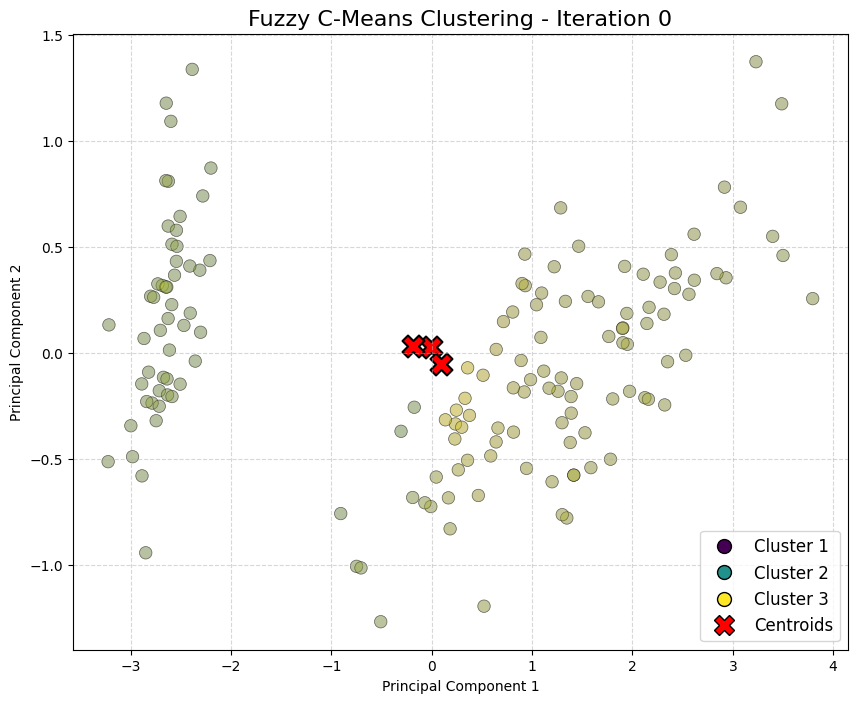

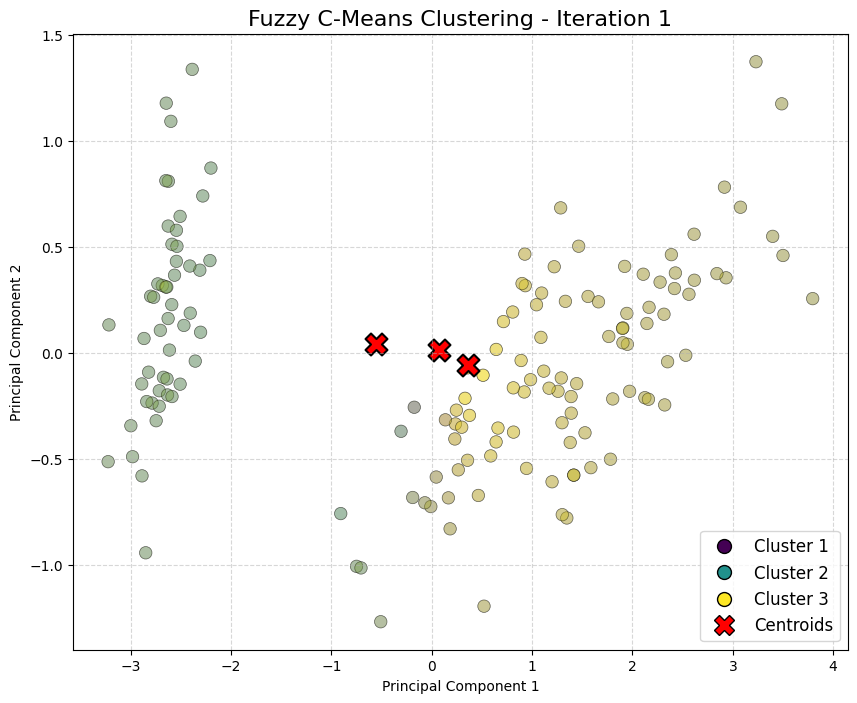

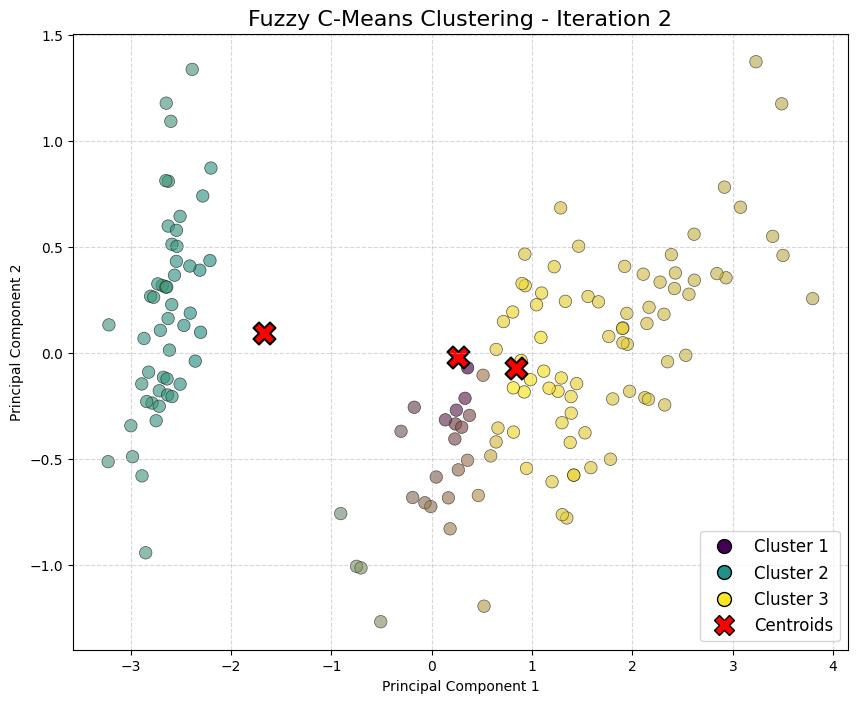

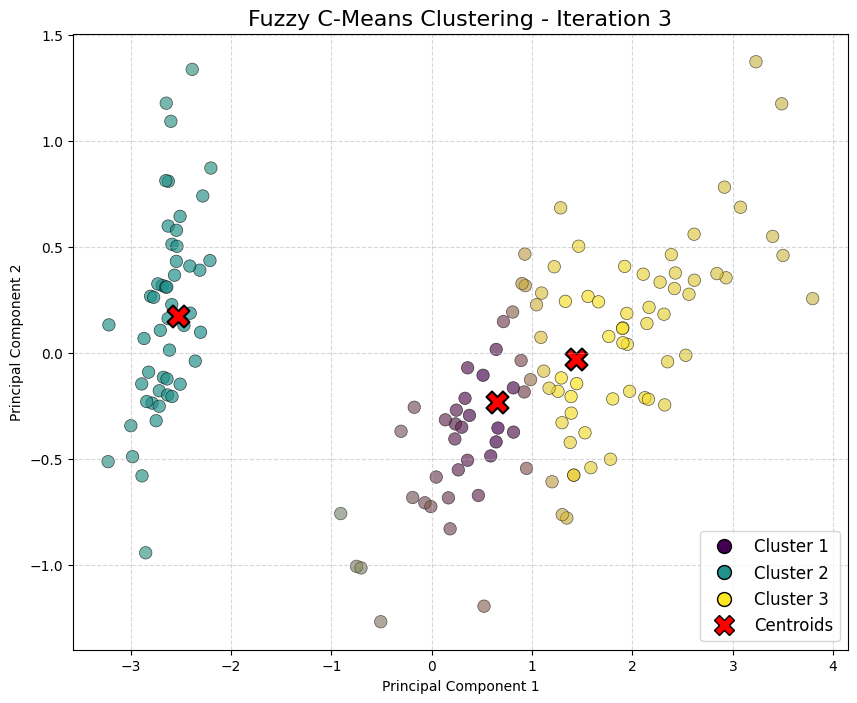

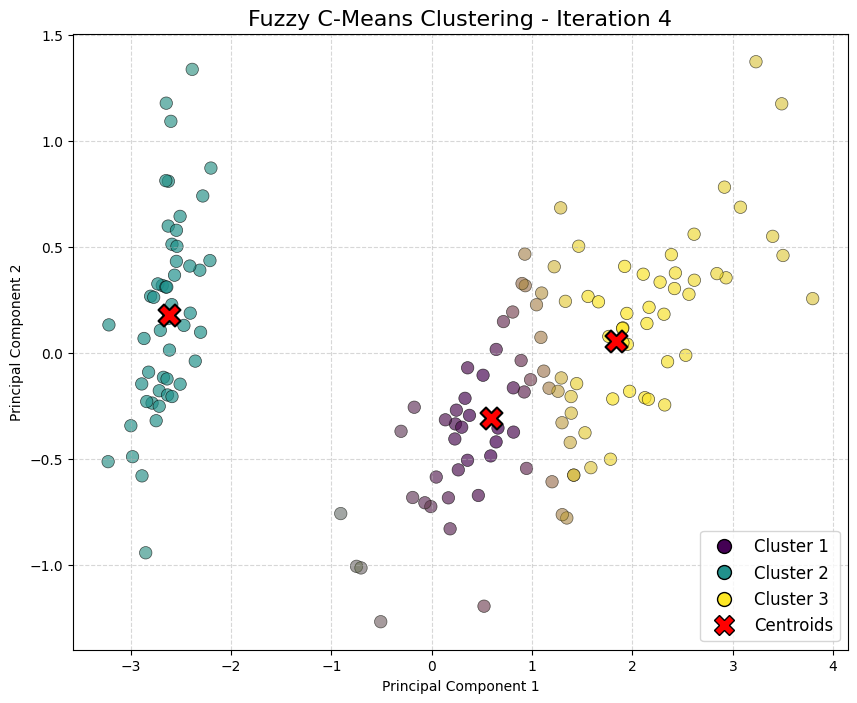

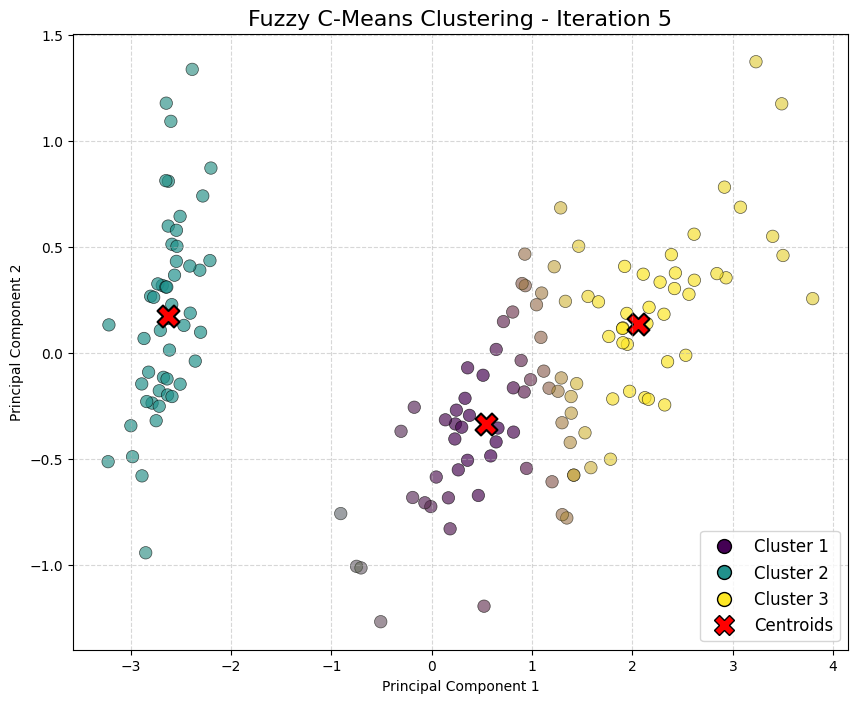

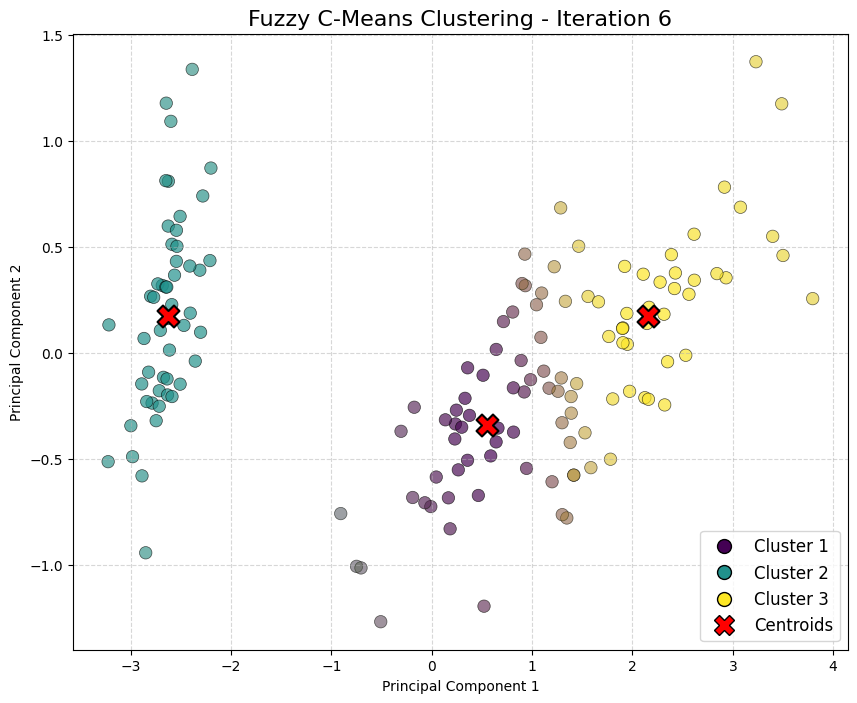

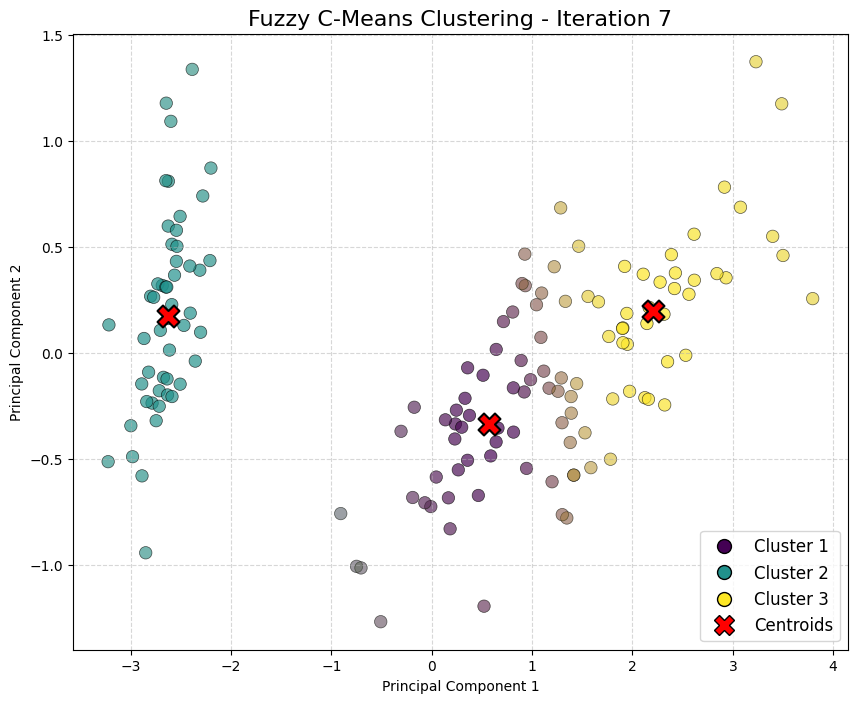

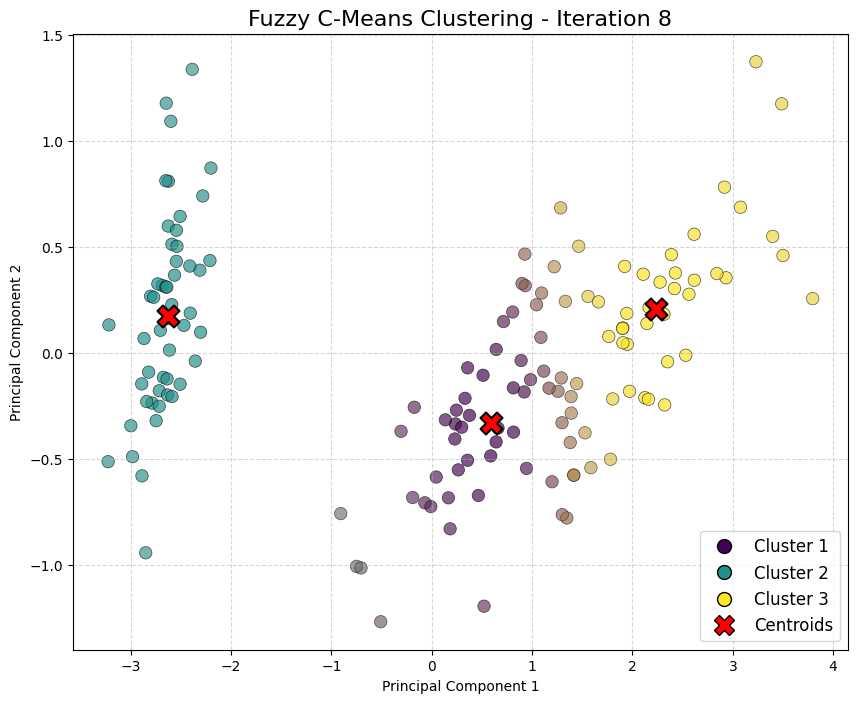

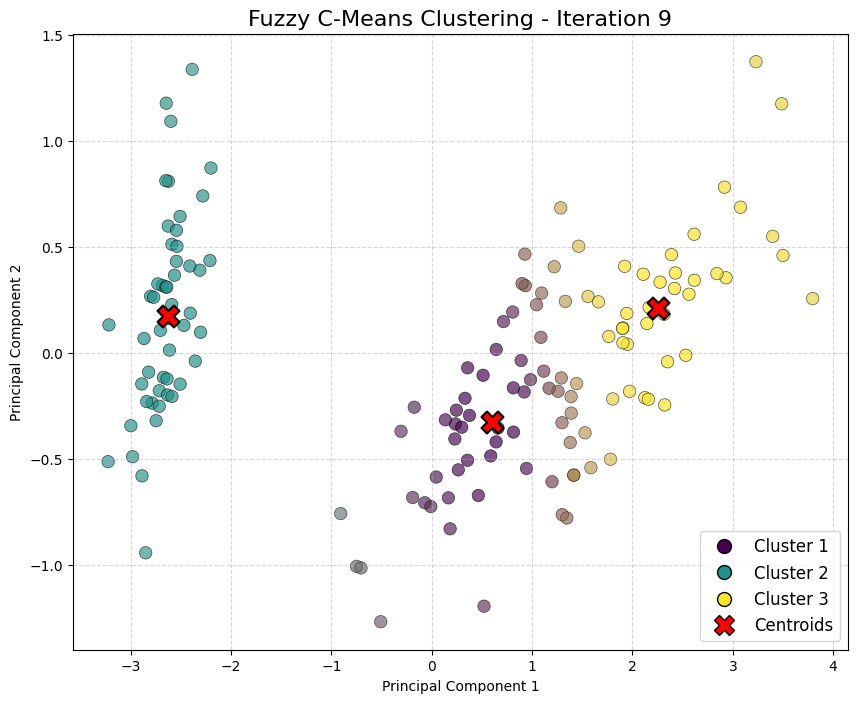

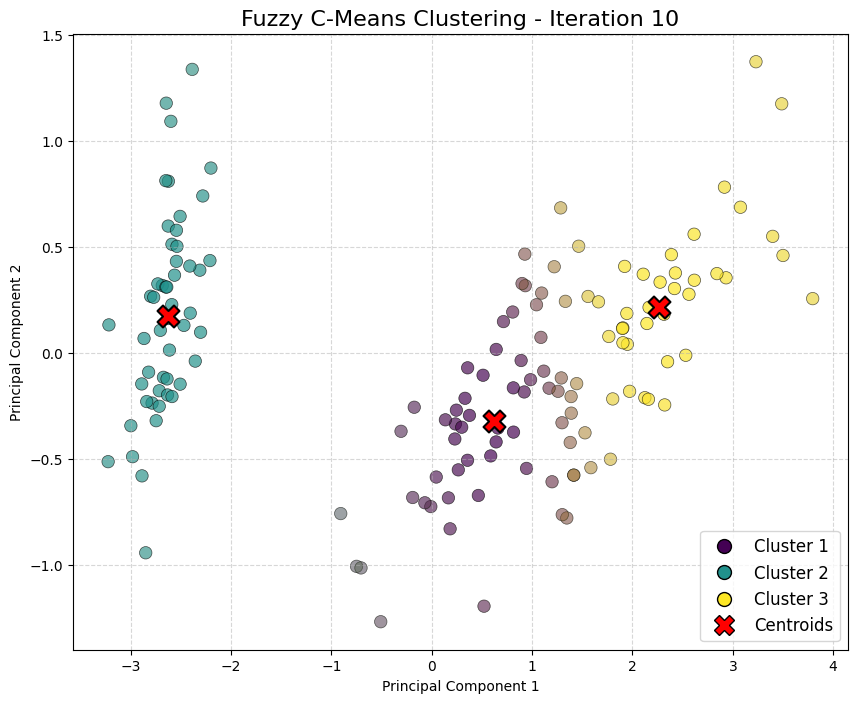

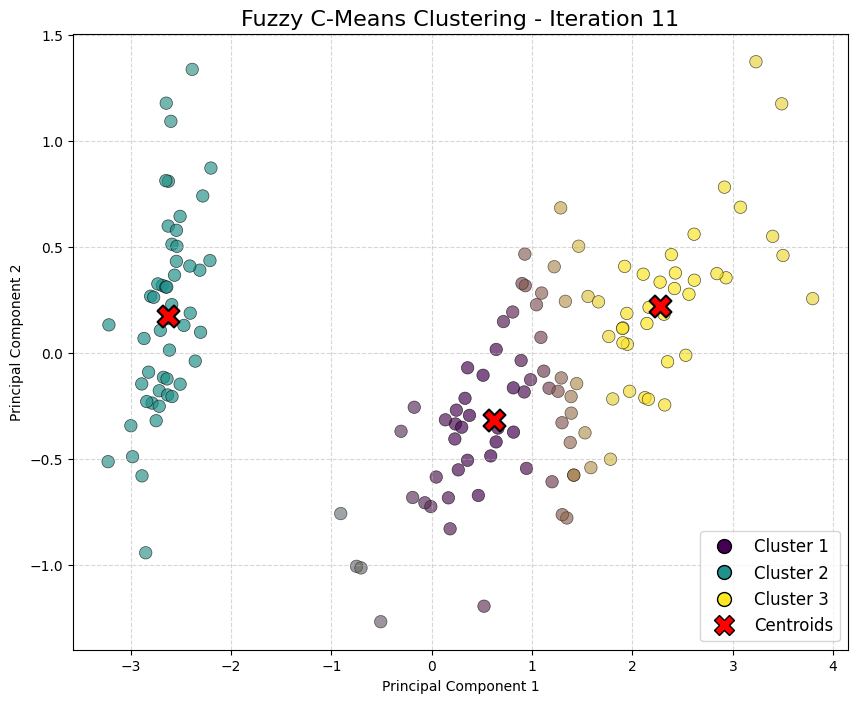

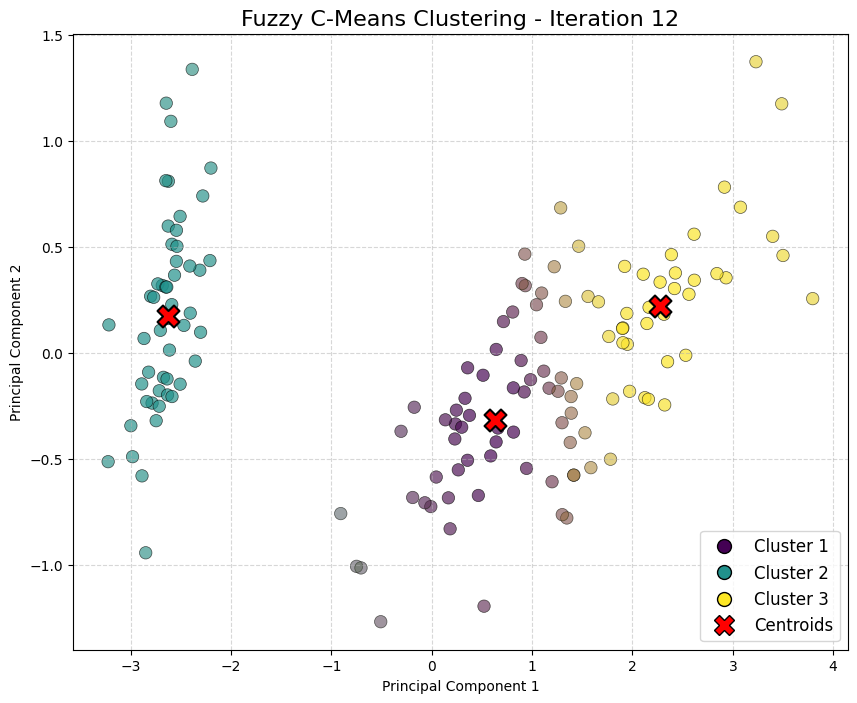

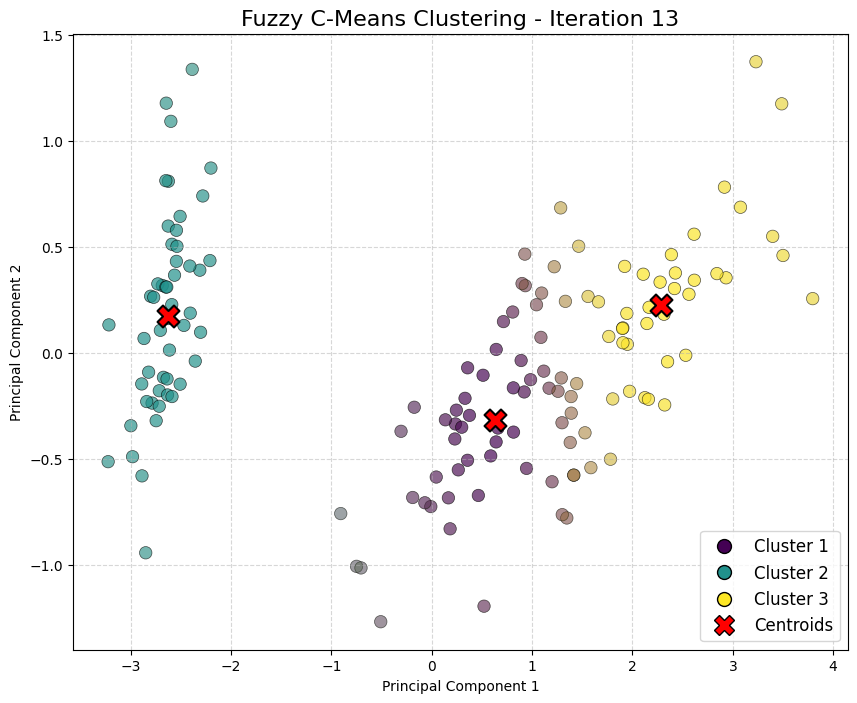

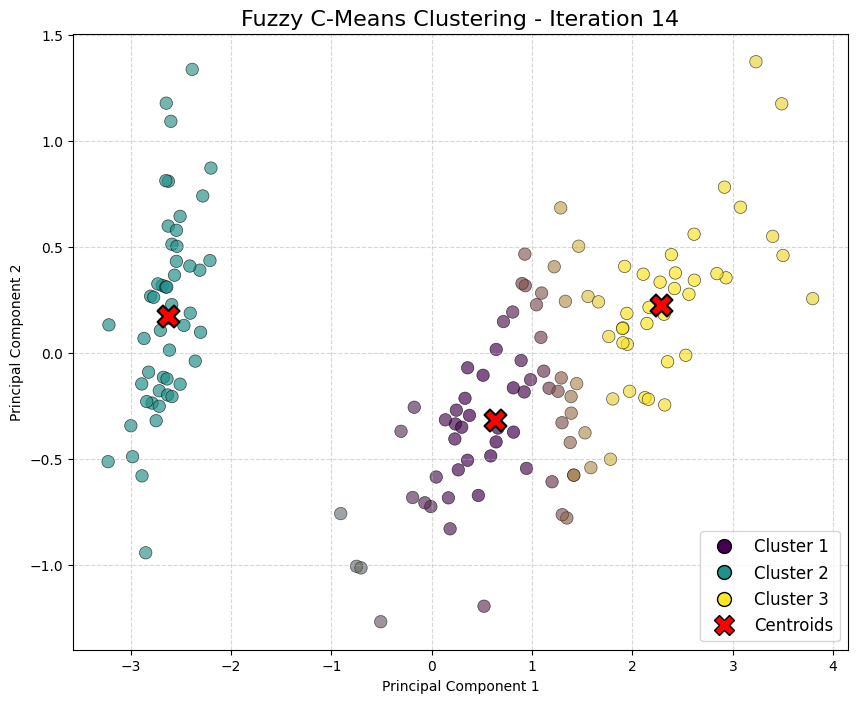

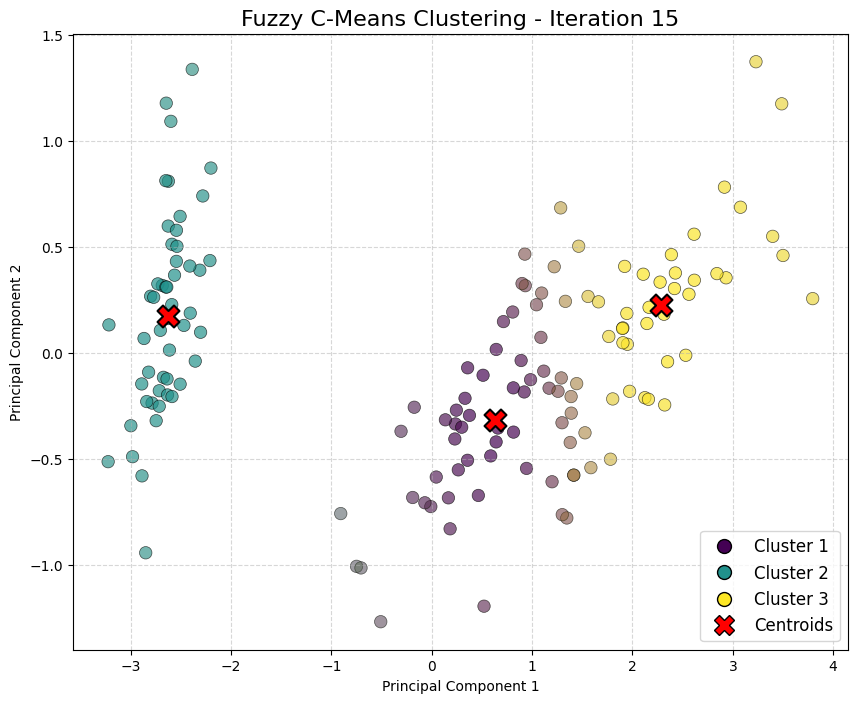

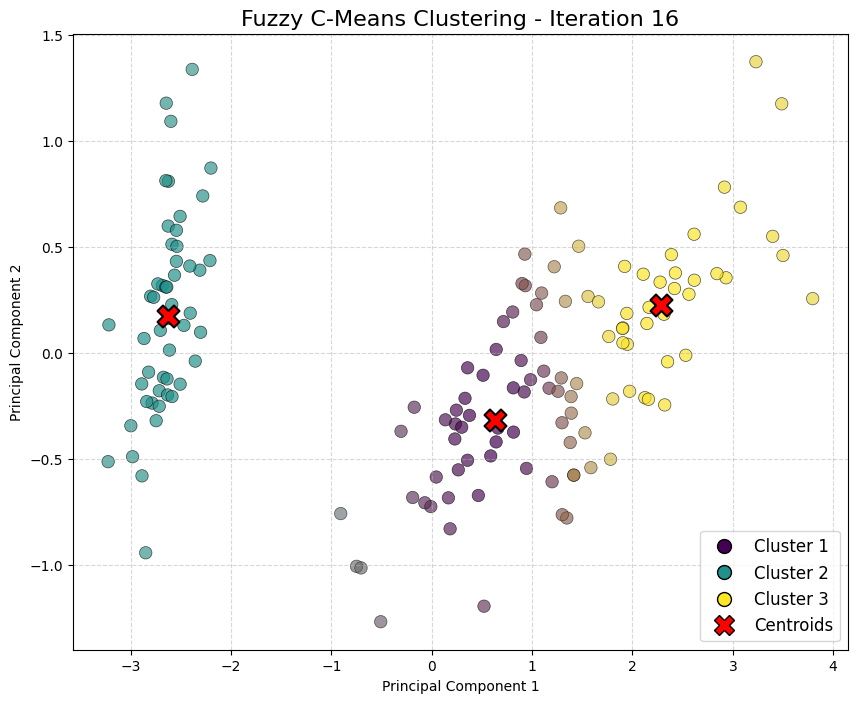

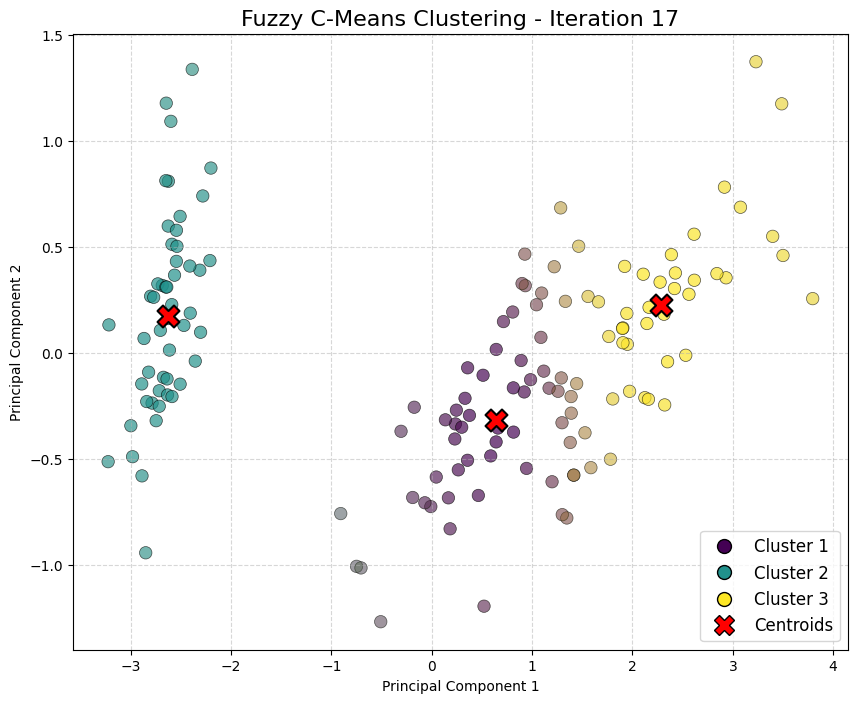

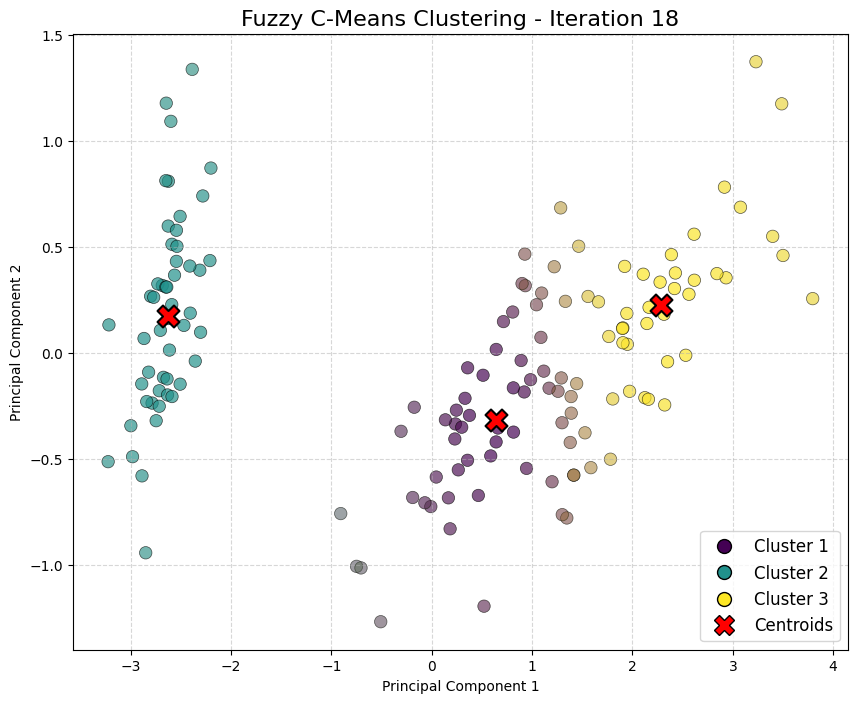

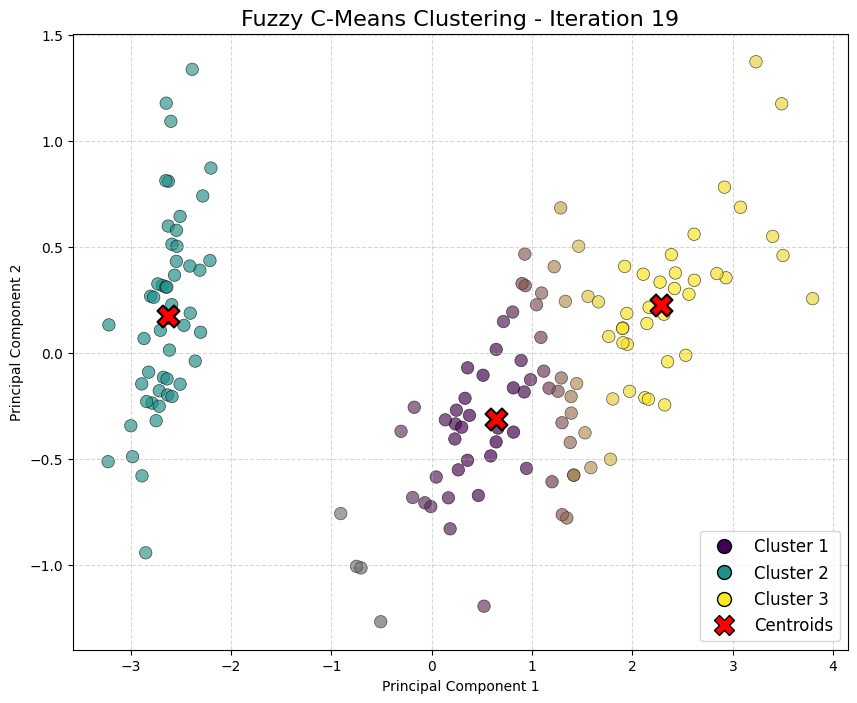

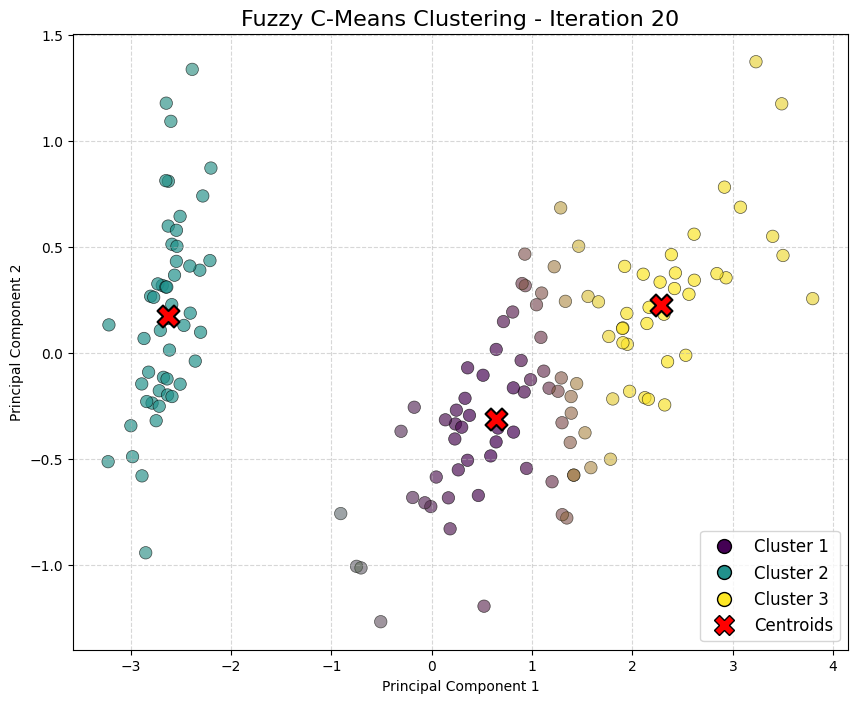

Converged at iteration 20


In [14]:
# Load the Iris dataset and reduce to 2D for visualization
iris = load_iris()
data = iris.data
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)

# Parameters
num_clusters = 3  # Number of clusters for Iris dataset
fuzziness = 2     # Fuzziness parameter

# Run Fuzzy C-Means
membership_matrix, cluster_centers = fuzzy_c_means(data_reduced, num_clusters, fuzziness)